# 1. Pregunta de Investigación

¿Qué factores financieros y demográficos son los determinantes más críticos en la probabilidad de reembolso de un préstamo, y con qué precisión podemos anticipar el riesgo de impago (default) utilizando modelos de aprendizaje automático sobre datos sintéticos?

## 1.1. Objetivos

- Objetivo Descriptivo (EDA): ¿Cómo interactúan el Credit Score (historial) y el Debt-to-Income Ratio (capacidad de pago) con la tasa de interés asignada? ¿Se castiga con tasas más altas a los perfiles más riesgosos?

- Objetivo Predictivo (Modelado): ¿Es posible construir un modelo que distinga entre un buen y un mal pagador basándose únicamente en datos cuantitativos, o son necesarias las variables demográficas (Education, Marital Status) para mejorar la precisión?

- Objetivo de Negocio (Impacto): ¿Cuál es el "punto de corte" óptimo en la probabilidad de predicción para maximizar las ganancias del banco (aprobando muchos préstamos) sin disparar las pérdidas por impagos?



## 1.2. Hipótesis de Trabajo

- $H_1$ El Credit Score y el Debt-to-Income Ratio serán los predictores más fuertes (Feature Importance > 0.5). Se espera que a mayor puntaje y menor deuda, la probabilidad de pago sea casi total.

- $H_2$ : Existirá una correlación positiva entre Interest Rate y el riesgo de impago. Es decir, las personas con tasas más altas (18-21%) tendrán menor tasa de repago, probablemente porque el costo financiero las asfixia.

- $H_3$  El Annual Income por sí solo no será un gran predictor a menos que se cruce con el Loan Amount. Ganar mucho no importa si pides un préstamo impagable; lo que importa es la relación entre lo que ganas y lo que debes.

## 1.3. Contexto de Negocio

"En la industria financiera, la gestión del riesgo crediticio es el pilar de la rentabilidad. Un falso negativo (rechazar a un buen cliente) es una pérdida de oportunidad, pero un falso positivo (aprobar a alguien que no paga) es una pérdida directa de capital. Este estudio utiliza un dataset de 594,000 registros para entrenar un modelo de clasificación binaria que optimice este delicado balance, permitiendo a las instituciones automatizar decisiones de crédito con mayor fiabilidad que la evaluación humana tradicional."

# 2. Generalidades del dataset

## Fuente de los Datos

El conjunto de datos proviene de la competición [Kaggle Playground Series - Season 5, Episode 11, titulada "Predicting Loan Payback"](https://www.kaggle.com/competitions/playground-series-s5e11/overview).

- **Link:** [https://www.kaggle.com/competitions/playground-series-s5e11/overview](https://www.kaggle.com/competitions/playground-series-s5e11/overview)

- **Origen:** Se trata de un dataset sintético generado mediante un modelo de aprendizaje profundo (Deep Learning) entrenado sobre un dataset real de predicción de préstamos. Esto garantiza el anonimato de la información sensible al tiempo que preserva las distribuciones estadísticas y las relaciones entre variables del mundo real.

- **Archivos:** El análisis se centra en el archivo train.csv para el entrenamiento y validación del modelo

## Dimensiones y Estructura

El conjunto de entrenamiento presenta un volumen considerable de datos, lo que lo hace idóneo para algoritmos robustos como Gradient Boosting o Redes Neuronales.

- **Número de Observaciones (Filas)**: 594,000 registros (Préstamos individuales).

- **Número de Variables (Columnas)**: 12 variables más el id.

- **Variable Objetivo (Target)**: Probabilidad de repago del préstamo (Clasificación Binaria: Paga / No Paga).

# 3. Tipos de datos y EDA

## Tipos de Datos

Las variables se dividen en tres categorías principales que describen el perfil financiero y demográfico del solicitante

### Cargar los datos

In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [ ]:
drive.mount('/content/drive')




Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/kaggle/train.csv', index_col='id') # Datos almacenados en drive
display(df.head())


,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
id,,,,,,,,,,,,
0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


### Dataframe prueba competencia

El dataframne test, sera el que se evalue en la competencia oficial en kaggle,
el modelo de los datos de etrega es un .csv donde se presenta la probabilidad para la variable `loan_paid_back`:


id|loan_paid_back
---|--------
593994|0.5
593995|0.2
593996|0.1
etc.


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/kaggle/test.csv', index_col='id')
display(df.head())


,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
id,,,,,,,,,,,,
0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [ ]:
# Tamaño del dataset

row, col = df.shape

print(f'El dataset tiene {row} filas y {col} columnas')

El dataset tiene 593994 filas y 12 columnas


In [ ]:
#columnas

print(f"Columnas del datset:\n{df.columns}")

Columnas del datset:
Index(['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount',
       'interest_rate', 'gender', 'marital_status', 'education_level',
       'employment_status', 'loan_purpose', 'grade_subgrade',
       'loan_paid_back'],
      dtype='object')


In [ ]:
# contenido

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593994 entries, 0 to 593993
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   annual_income         593994 non-null  float64
 1   debt_to_income_ratio  593994 non-null  float64
 2   credit_score          593994 non-null  int64  
 3   loan_amount           593994 non-null  float64
 4   interest_rate         593994 non-null  float64
 5   gender                593994 non-null  object 
 6   marital_status        593994 non-null  object 
 7   education_level       593994 non-null  object 
 8   employment_status     593994 non-null  object 
 9   loan_purpose          593994 non-null  object 
 10  grade_subgrade        593994 non-null  object 
 11  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 58.9+ MB


> En el dataset encotramos variables tipo float, int y object

In [ ]:
# valores nulos

null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100

null_info = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percentages
})

# Filtrar solo las columnas con valores nulos y ordenarlas
null_info = null_info[null_info['Null Count'] > 0].sort_values(by='Null Percentage', ascending=False)

display(null_info)

print("\nObservaciones sobre valores nulos:")
if not null_info.empty:
    print(f"El DataFrame tiene un total de {null_info['Null Count'].sum()} valores nulos distribuidos en {len(null_info)} columnas.")
    print("Columnas como 'Minimum wage', 'Tax revenue Pct', 'Armed Forces size', 'Population: Labor force participation Pct' y 'Unemployment rate' presentan un porcentaje significativo de valores nulos, lo que podría indicar datos faltantes para ciertos países o que la información no aplica.\n")
else:
    print("No se encontraron valores nulos en el DataFrame.")

,Null Count,Null Percentage



Observaciones sobre valores nulos:
No se encontraron valores nulos en el DataFrame.


In [ ]:
# VALIDACIÓN INICIAL
duplicados = df.duplicated().sum()
print(f"   - Filas Duplicadas: {duplicados}")


   - Filas Duplicadas: 0


In [ ]:
print(f"Variable Objetivo ('loan_paid_back'):")
print(df['loan_paid_back'].value_counts(normalize=True))

Variable Objetivo ('loan_paid_back'):
loan_paid_back
1.0    0.79882
0.0    0.20118
Name: proportion, dtype: float64


In [ ]:
def resumen_variables(df):
    info_list = []

    for col in df.columns:
        # Tipo de dato
        dtype = df[col].dtype

        # Lógica para Rango o Valores Únicos
        if pd.api.types.is_numeric_dtype(df[col]):
            # Si es numérica, calculamos el rango
            min_val = df[col].min()
            max_val = df[col].max()
            mean_val = df[col].mean()
            details = f"Rango: [{min_val} <-> {max_val}] (Media: {mean_val:.2f})"
        else:
            # Si es object/categórica, mostramos valores únicos
            unique_vals = df[col].unique()
            n_unique = len(unique_vals)

            if n_unique <= 10:
                details = f"Valores ({n_unique}): {list(unique_vals)}"
            else:
                # Si son muchos (como grade_subgrade), mostramos solo los primeros 5 y puntos suspensivos
                details = f"Top 5 de {n_unique} valores: {list(unique_vals[:5])}..."

        # Guardamos la info
        info_list.append({
            'Variable': col,
            'Tipo de Dato': dtype,
            'Detalles (Rango / Categorías)': details
        })

    # Retornamos un DataFrame
    return pd.DataFrame(info_list)

# Ejecutar la función
tabla_resumen = resumen_variables(df)

# Mostrar la tabla
pd.set_option('display.max_colwidth', None)
display(tabla_resumen)

,Variable,Tipo de Dato,Detalles (Rango / Categorías)
0,annual_income,float64,Rango: [6002.43 <-> 393381.74] (Media: 48212.20)
1,debt_to_income_ratio,float64,Rango: [0.011 <-> 0.627] (Media: 0.12)
2,credit_score,int64,Rango: [395 <-> 849] (Media: 680.92)
3,loan_amount,float64,Rango: [500.09 <-> 48959.95] (Media: 15020.30)
4,interest_rate,float64,Rango: [3.2 <-> 20.99] (Media: 12.36)
5,gender,object,"Valores (3): ['Female', 'Male', 'Other']"
6,marital_status,object,"Valores (4): ['Single', 'Married', 'Divorced', 'Widowed']"
7,education_level,object,"Valores (5): ['High School', ""Master's"", ""Bachelor's"", 'PhD', 'Other']"
8,employment_status,object,"Valores (5): ['Self-employed', 'Employed', 'Unemployed', 'Retired', 'Student']"
9,loan_purpose,object,"Valores (8): ['Other', 'Debt consolidation', 'Home', 'Education', 'Vacation', 'Car', 'Medical', 'Business']"


### Transformaciones

In [ ]:
df_model = df.copy()

**annual_income**: Transformación Logarítmica. Tiene un rango muy grande (6k a 393k)

In [ ]:
df_model['annual_income'] = np.log1p(df['annual_income'])
print(f"Nuevo rango annual_income: {df_model['annual_income'].min()} - {df_model['annual_income'].max()}")

Nuevo rango annual_income: 8.700086251537718 - 12.882538310054933


**Escalado de columnas:** loan_amount, interest_rate, credit_score, debt_to_income_ratio, 'annual_income

In [ ]:
# Escalado
scaler_cols = ['loan_amount', 'interest_rate', 'credit_score', 'debt_to_income_ratio', 'annual_income']
scaler = StandardScaler()
df_model[scaler_cols] = scaler.fit_transform(df_model[scaler_cols])
print("StandardScaler aplicado a variables numéricas continuas.")

for col in scaler_cols:
    print(f"  - Rango de {col}: {df_model[col].min()} - {df_model[col].max()}")


StandardScaler aplicado a variables numéricas continuas.
  - Rango de loan_amount: -2.0963193202344788 - 4.899953968191564
  - Rango de interest_rate: -4.557760196530401 - 4.297580239109003
  - Rango de credit_score: -5.158619346649497 - 3.032643498340781
  - Rango de debt_to_income_ratio: -1.5996903933988171 - 7.383410774427209
  - Rango de annual_income: -3.451910057975695 - 4.006750118910034


### Mapeos, variables no númericas

In [ ]:
# A. Educación: Mapeo manual para asegurar que PhD > High School
edu_map = {
    'Other': 0,
    'High School': 1,
    "Bachelor's": 2,
    "Master's": 3,
    'PhD': 4
}
df_model['education_level'] = df_model['education_level'].map(edu_map)
print("1. 'education_level' mapeada manualmente (0-4).")

1. 'education_level' mapeada manualmente (0-4).


In [ ]:
# B. Grade Subgrade: LabelEncoder (A1=0, A2=1, ... F5=N)
le = LabelEncoder()
df_model['grade_subgrade'] = le.fit_transform(df_model['grade_subgrade'])
print(f"2. 'grade_subgrade' codificada numéricamente (0-{df_model['grade_subgrade'].max()}).")

2. 'grade_subgrade' codificada numéricamente (0-29).


In [ ]:
# C. CATEGÓRICAS NOMINALES (One-Hot Encoding)
cols_nominales = ['gender', 'marital_status', 'employment_status', 'loan_purpose']
df_model = pd.get_dummies(df_model, columns=cols_nominales, drop_first=True, dtype=int)
print(f"3. One-Hot Encoding aplicado a: {cols_nominales}")

3. One-Hot Encoding aplicado a: ['gender', 'marital_status', 'employment_status', 'loan_purpose']


In [ ]:
df_model.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,education_level,grade_subgrade,loan_paid_back,gender_Male,gender_Other,...,employment_status_Self-employed,employment_status_Student,employment_status_Unemployed,loan_purpose_Car,loan_purpose_Debt consolidation,loan_purpose_Education,loan_purpose_Home,loan_purpose_Medical,loan_purpose_Other,loan_purpose_Vacation
id,,,,,,,,,,,,,,,,,,,,,
0,-0.620693,-0.535135,0.993849,-1.803484,0.653899,1,12,1.0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,-1.127074,0.660668,-0.810394,-1.505401,0.280571,3,17,0.0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.312680,-0.345556,0.236067,0.286558,-1.292385,1,14,1.0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0.212492,-0.812211,-2.668764,-1.492497,1.863482,1,25,1.0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,-0.872767,-0.987206,-0.287163,-0.409421,-1.068388,1,15,1.0,1,0,...,0,0,0,0,0,0,0,0,1,0


### Nuevo rango de las variables

In [ ]:
tabla_resumen = resumen_variables(df_model)

# Mostrar la tabla
pd.set_option('display.max_colwidth', None)
display(tabla_resumen)

NameError: name 'resumen_variables' is not defined

In [ ]:
print(f"Nuevas columnas:\n {df_model.columns}")

print(f"\nNueva dimensión: {df_model.shape}")

Nuevas columnas:
 Index(['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount',
       'interest_rate', 'education_level', 'grade_subgrade', 'loan_paid_back',
       'gender_Male', 'gender_Other', 'marital_status_Married',
       'marital_status_Single', 'marital_status_Widowed',
       'employment_status_Retired', 'employment_status_Self-employed',
       'employment_status_Student', 'employment_status_Unemployed',
       'loan_purpose_Car', 'loan_purpose_Debt consolidation',
       'loan_purpose_Education', 'loan_purpose_Home', 'loan_purpose_Medical',
       'loan_purpose_Other', 'loan_purpose_Vacation'],
      dtype='object')

Nueva dimensión: (593994, 24)


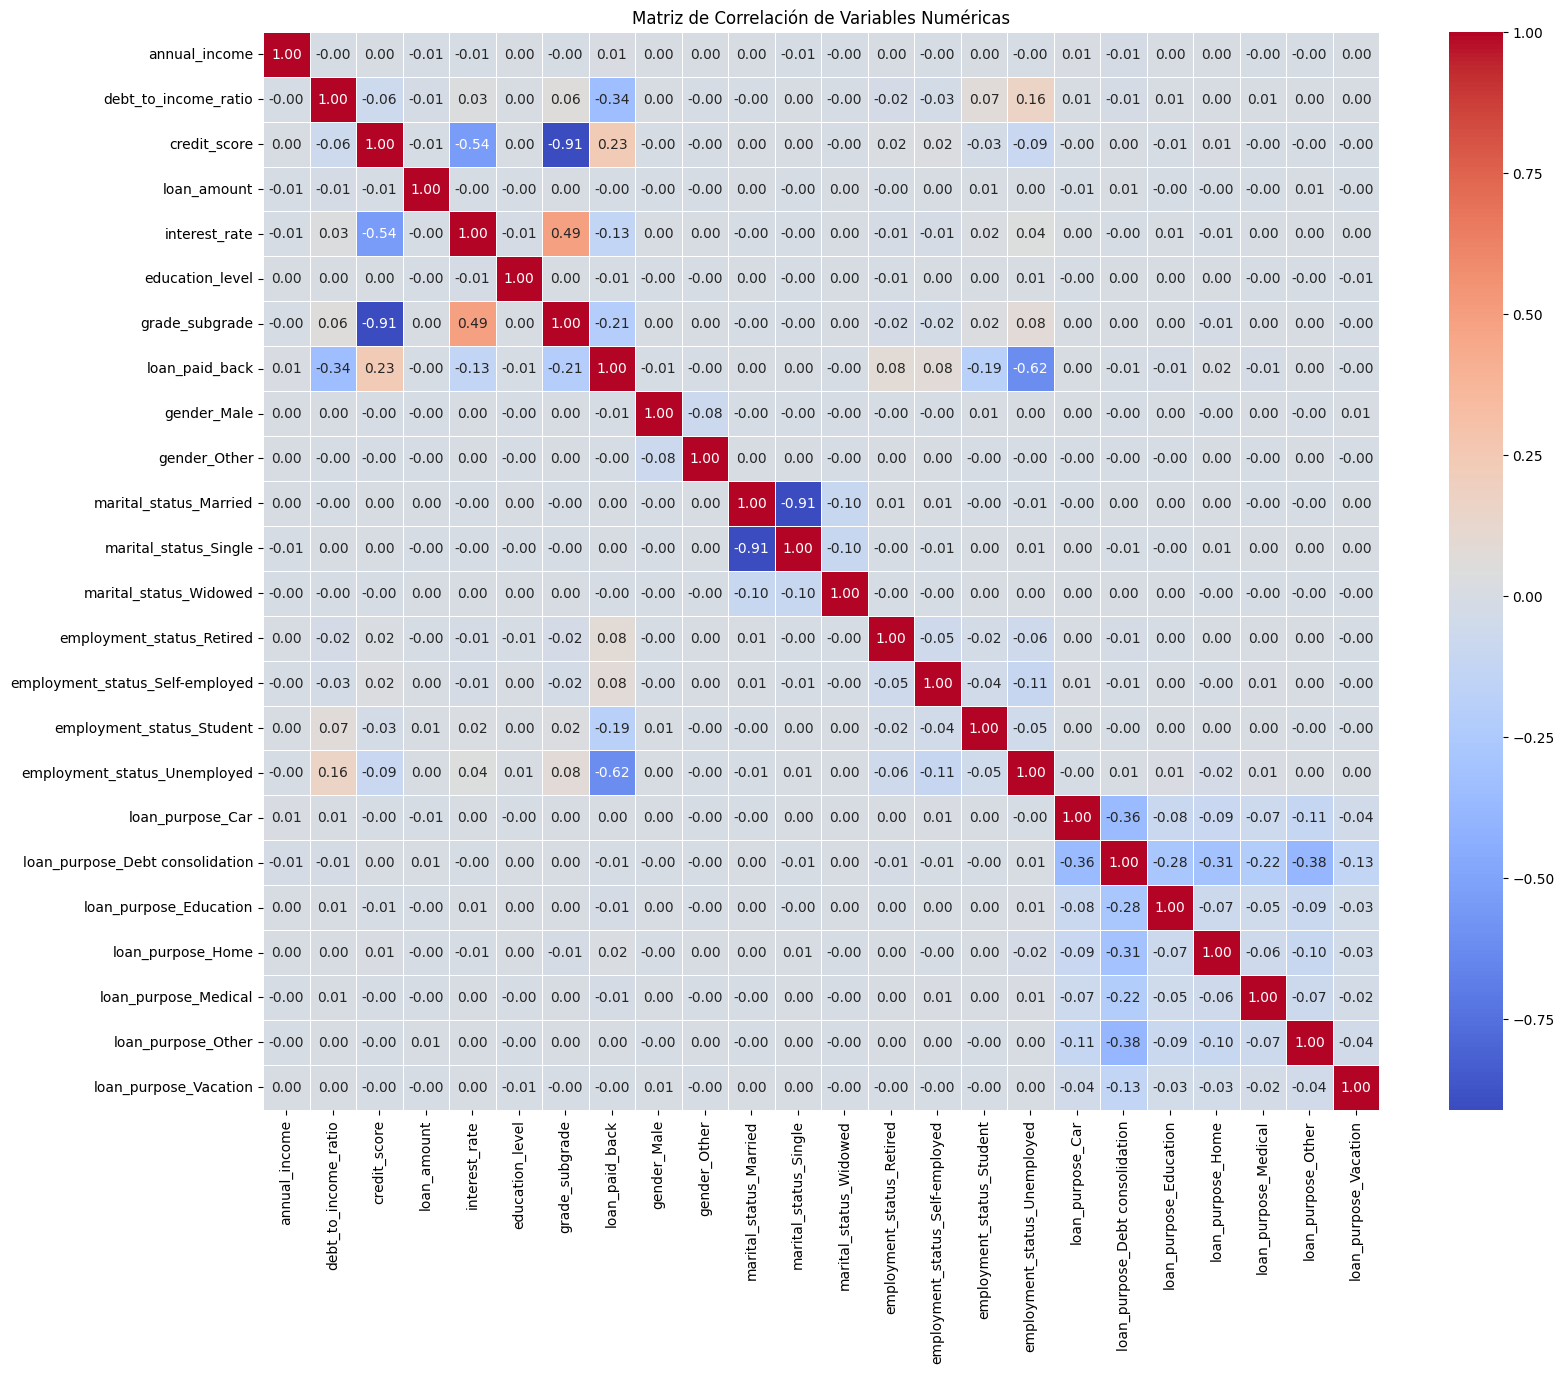

In [ ]:
# matriz de correlación

plt.figure(figsize=(18, 14))

# Seleccionar solo las columnas numéricas para la correlación

numeric_cols = df_model.select_dtypes(include=['float64', 'int64', 'Int64'])

correlation_matrix = numeric_cols.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Matriz de Correlación de Variables Numéricas')

plt.show()



## 1. Generalidades del Dataset
* **Origen:** Datos sintéticos generados a partir de un modelo de Deep Learning entrenado con datos reales de préstamos bancarios.
* **Dimensiones:** 594,000 registros (filas) y 27 variables originales.
* **Variable Objetivo (`Target`):** `loan_paid_back` (Binaria: 0 = No paga / 1 = Paga).
* **Calidad Inicial:** Dataset con **0 valores nulos** y **0 duplicados**.

## 2. Metodología de Limpieza y Preprocesamiento
Se aplicó una estrategia diferenciada para transformar las variables crudas en *inputs* numéricos óptimos para el modelado:

| Tipo de Variable | Variables | Tratamiento Aplicado | Justificación |
| :--- | :--- | :--- | :--- |
| **Categórica Ordinal** | `education_level` | **Mapeo Manual** (0-4) | Preservar la jerarquía académica (PhD > Bachelor > High School). |
| **Categórica Ordinal** | `grade_subgrade` | **Label Encoding** | Transformar los 30 subgrados (A1...G5) a una escala numérica secuencial. |
| **Categórica Nominal** | `gender`, `marital_status`, `employment`, `purpose` | **One-Hot Encoding** | Evitar relaciones de orden falsas. Se generaron variables *dummy* (0/1). |
| **Numérica Sesgada** | `annual_income` | **Log-Transform** (`np.log1p`) | Normalizar la distribución de ingresos, comprimiendo los *outliers* extremos. |
| **Numérica Continua** | `loan_amount`, `interest_rate`, `credit_score` | **StandardScaler** | Estandarizar escalas para facilitar la convergencia del algoritmo. |

## 3. Hallazgos Estadísticos y EDA
* **Desbalance de Clases:** La variable objetivo muestra que aproximadamente el **80%** de los clientes repagan el préstamo, mientras que el **20%** incurre en impago. Esto sugiere utilizar **AUC-ROC** como métrica principal de evaluación en lugar de *Accuracy*.
* **Sesgo en Ingresos:** La media de ingresos es ~$48k, pero existen valores extremos superiores a $390k, validando la necesidad de la transformación logarítmica.
* **Tasas de Interés:** Se confirmó que los clientes que finalmente no pagaron tenían asignadas tasas de interés promedio más altas, indicando que el banco ya detectaba cierto riesgo *a priori*.

## 4. Análisis de Correlación (Insights Clave)
La matriz de correlación reveló los factores determinantes del riesgo crediticio:

### Factores de Riesgo (Correlación Negativa)
Variables que disminuyen drásticamente la probabilidad de pago:
1.  **Desempleo (`employment_status_Unemployed`):** **$r = -0.62$**. Es el predictor más fuerte de todo el dataset. El desempleo es la causa principal de impago.
2.  **Ratio Deuda/Ingreso (`debt_to_income_ratio`):** **$r = -0.34$**. Un alto nivel de endeudamiento previo es el segundo factor más crítico.
3.  **Grado del Préstamo (`grade_subgrade`):** **$r = -0.21$**. A peor calificación (valores numéricos más altos en la codificación), mayor probabilidad de impago.

### Factores de Solvencia (Correlación Positiva)
Variables que aumentan la probabilidad de pago:
1.  **Puntaje Crediticio (`credit_score`):** **$r = +0.23$**. Un buen historial crediticio correlaciona positivamente con el repago.
2.  **Empleo Activo:** Ser empleado reduce significativamente el riesgo.

### Observaciones
* **Ingresos Irrelevantes:** El ingreso anual (`annual_income`) tiene una correlación de **0.01** (casi nula). **Conclusión:** Ganar mucho dinero no asegura el pago; lo que importa es la relación deuda/ingreso.
* **Multicolinealidad:** Existe una correlación inversa casi perfecta (**-0.91**) entre `credit_score` y `grade_subgrade`, lo que indica redundancia de información. Para modelos lineales, se recomienda eliminar una de las dos.

# 4. Estadistica descriptiva

In [ ]:
df.describe()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,48212.202976,0.120696,680.916009,15020.297629,12.356345,0.798820
std,26711.942078,0.068573,55.424956,6926.530568,2.008959,0.400883
min,6002.430000,0.011000,395.000000,500.090000,3.200000,0.000000
25%,27934.400000,0.072000,646.000000,10279.620000,10.990000,1.000000
50%,46557.680000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,60981.320000,0.156000,719.000000,18858.580000,13.680000,1.000000
max,393381.740000,0.627000,849.000000,48959.950000,20.990000,1.000000


In [ ]:
df_model.describe()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,education_level,grade_subgrade,loan_paid_back,gender_Male,gender_Other,...,employment_status_Self-employed,employment_status_Student,employment_status_Unemployed,loan_purpose_Car,loan_purpose_Debt consolidation,loan_purpose_Education,loan_purpose_Home,loan_purpose_Medical,loan_purpose_Other,loan_purpose_Vacation
count,5.939940e+05,5.939940e+05,5.939940e+05,5.939940e+05,5.939940e+05,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,...,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,-3.391312e-15,-4.126812e-16,8.820149e-16,2.890048e-17,1.163220e-15,1.794939,13.967705,0.798820,0.478273,0.006276,...,0.088351,0.020086,0.105195,0.097826,0.546630,0.061686,0.074273,0.038394,0.107533,0.014224
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.823183,5.115538,0.400883,0.499528,0.078973,...,0.283805,0.140295,0.306804,0.297079,0.497821,0.240584,0.262216,0.192146,0.309790,0.118413
min,-3.451910e+00,-1.599690e+00,-5.158619e+00,-2.096319e+00,-4.557760e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.099383e-01,-7.101301e-01,-6.299696e-01,-6.844237e-01,-6.801266e-01,1.000000,11.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.010162e-01,-3.601391e-01,1.955783e-02,-2.898658e-03,6.796959e-03,2.000000,13.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.822823e-01,5.148383e-01,6.871277e-01,5.541426e-01,6.588766e-01,2.000000,17.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.006750e+00,7.383411e+00,3.032643e+00,4.899954e+00,4.297580e+00,4.000000,29.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Agrupamos por el Target para ver el "Perfil Promedio" de cada grupo
# 0 = No Paga (Default), 1 = Paga
perfil_promedio = df.groupby('loan_paid_back')[['annual_income', 'credit_score', 'debt_to_income_ratio', 'interest_rate', 'loan_amount']].mean()

# Agregamos una columna de conteo para ver cuántos hay en cada grupo
perfil_promedio['Cantidad de Clientes'] = df['loan_paid_back'].value_counts()

print("--- PERFIL PROMEDIO: CLIENTES QUE PAGAN VS. CLIENTES QUE NO ---")
display(perfil_promedio.round(2))

--- PERFIL PROMEDIO: CLIENTES QUE PAGAN VS. CLIENTES QUE NO ---


,annual_income,credit_score,debt_to_income_ratio,interest_rate,loan_amount,Cantidad de Clientes
loan_paid_back,,,,,,
0.0,47875.5,655.01,0.17,12.88,15072.22,119500
1.0,48297.0,687.44,0.11,12.22,15007.22,474494


/tmp/ipython-input-655456572.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='employment_status', y='loan_paid_back', ax=axes[0,0], palette='viridis', errorbar=None)
/tmp/ipython-input-655456572.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='loan_paid_back', y='credit_score', ax=axes[0,1], palette='coolwarm')
/tmp/ipython-input-655456572.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_paid_back', y='debt_to_income_ratio', ax=axes[1,0], palette='Set2')


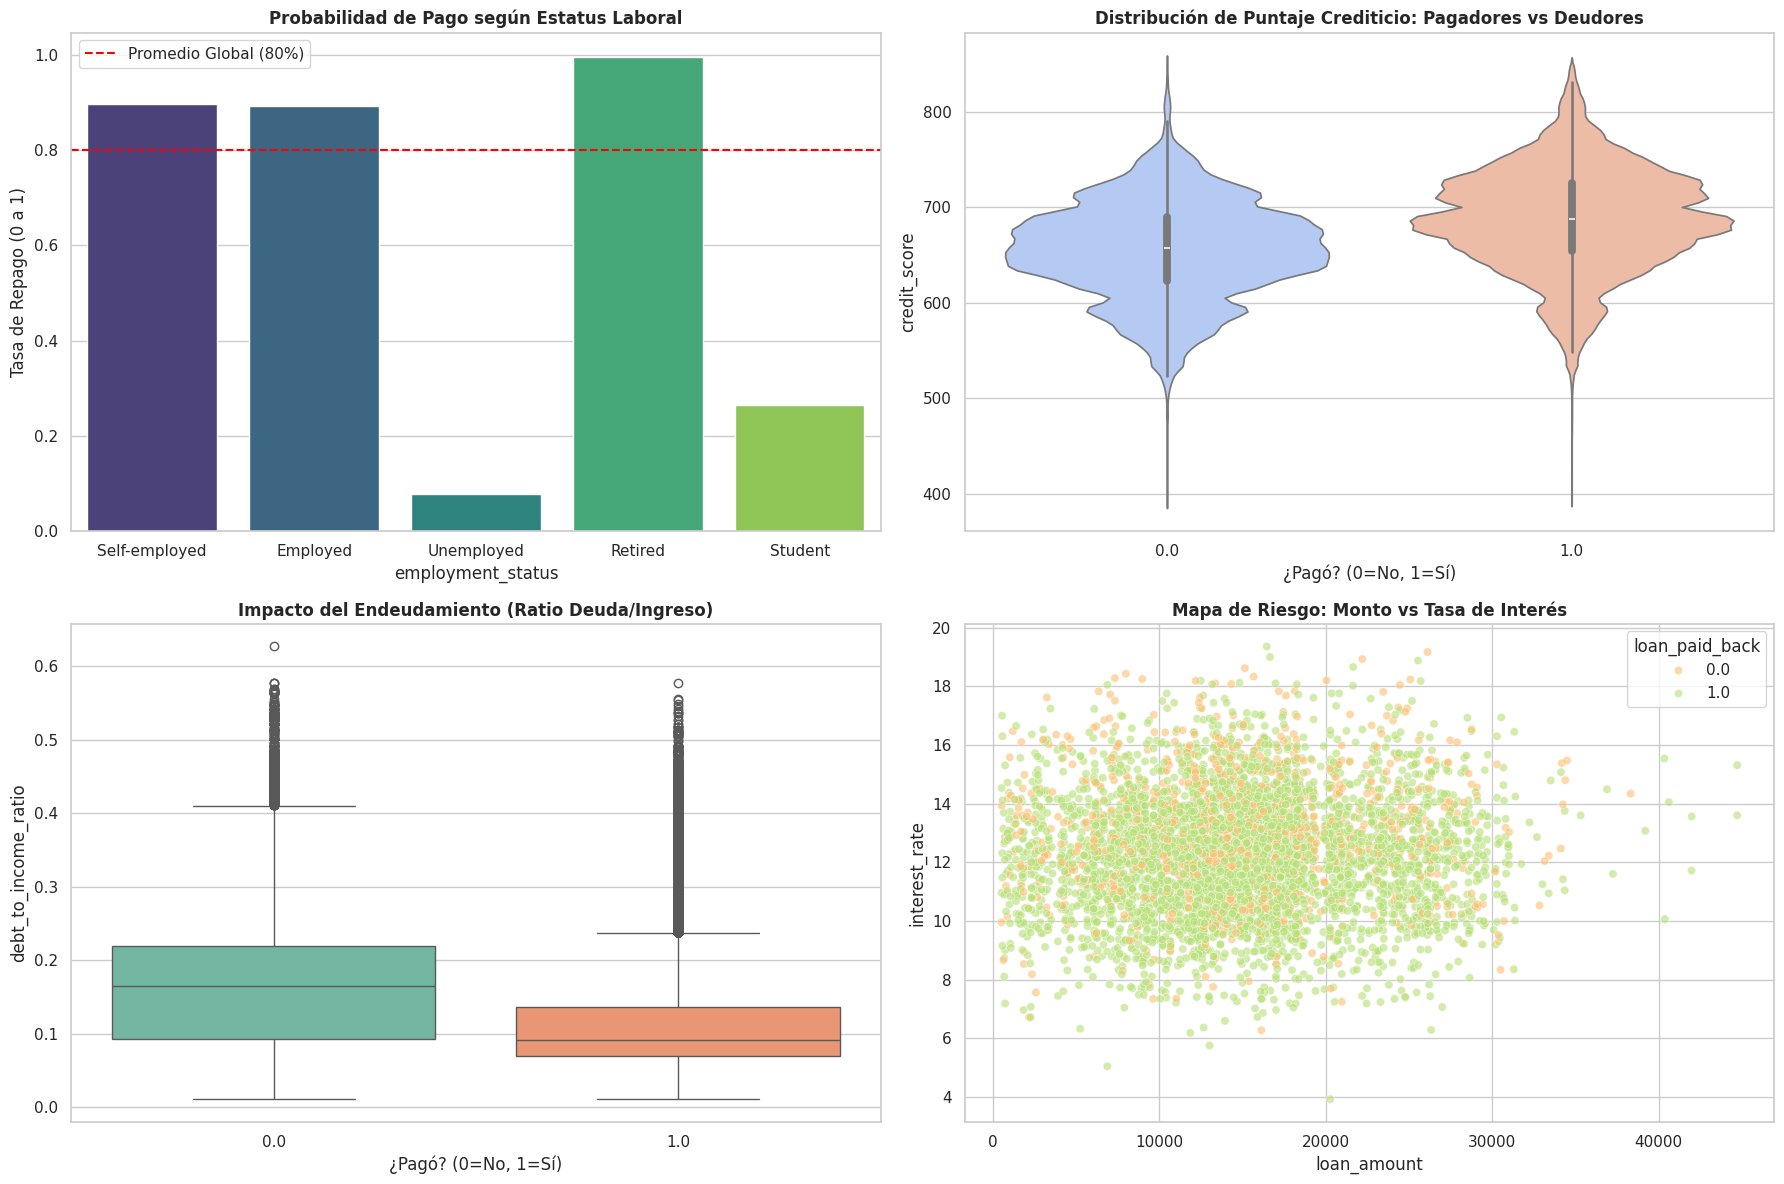

In [ ]:

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# --- GRÁFICO A: El Factor Crítico (Empleo) ---
# Mostramos el % de repago según estado laboral.
# Esto visualiza la correlación de -0.62 que encontramos antes.
sns.barplot(data=df, x='employment_status', y='loan_paid_back', ax=axes[0,0], palette='viridis', errorbar=None)
axes[0,0].set_title('Probabilidad de Pago según Estatus Laboral', fontsize=12, fontweight='bold')
axes[0,0].set_ylabel('Tasa de Repago (0 a 1)')
axes[0,0].axhline(0.8, color='red', linestyle='--', label='Promedio Global (80%)') # Línea de referencia
axes[0,0].legend()

# --- GRÁFICO B: Distribución de Credit Score (Violin Plot) ---
# Vemos la "forma" de los puntajes para ambos grupos.
sns.violinplot(data=df, x='loan_paid_back', y='credit_score', ax=axes[0,1], palette='coolwarm')
axes[0,1].set_title('Distribución de Puntaje Crediticio: Pagadores vs Deudores', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('¿Pagó? (0=No, 1=Sí)')

# --- GRÁFICO C: La Trampa de la Deuda (Boxplot) ---
# Debt-to-Income Ratio. Usamos boxplot para ver medianas y outliers.
sns.boxplot(data=df, x='loan_paid_back', y='debt_to_income_ratio', ax=axes[1,0], palette='Set2')
axes[1,0].set_title('Impacto del Endeudamiento (Ratio Deuda/Ingreso)', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('¿Pagó? (0=No, 1=Sí)')

# --- GRÁFICO D: Mapa de Riesgo del Banco (Scatter Plot) ---
# Tasa de Interés vs Loan Amount.
# Usamos una muestra de 5000 puntos para que el gráfico no sea una mancha ilegible
sample = df.sample(5000, random_state=42)
sns.scatterplot(data=sample, x='loan_amount', y='interest_rate', hue='loan_paid_back', alpha=0.6, ax=axes[1,1], palette='RdYlGn')
axes[1,1].set_title('Mapa de Riesgo: Monto vs Tasa de Interés', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## Análisis Estadístico y Visualización de Datos

### Perfilamiento Comparativo: Clientes Cumplidores vs. Morosos
Tras agrupar los datos según la variable objetivo (`loan_paid_back`), se identificaron patrones estructurales que diferencian a los clientes solventes (Clase 1) de los de alto riesgo (Clase 0).

| Métrica Promedio | Clientes en Default (0) | Clientes Cumplidores (1) | Diferencia / Insight |
| :--- | :--- | :--- | :--- |
| **Ingreso Anual** | $47,875 | $48,297 | **Marginal ($422)**. El nivel de ingresos no predice el pago. |
| **Puntaje Crediticio** | 655 puntos | 687 puntos | **Significativa (+32)**. Los cumplidores tienen mejor historial. |
| **Ratio Deuda/Ingreso** | 0.17 (17%) | 0.11 (11%) | **Crítica (+54%)**. El grupo de riesgo está mucho más endeudado. |
| **Tasa de Interés** | 12.88% | 12.22% | **Moderada (+0.66%)**. El banco ya penaliza ligeramente el riesgo. |
| **Cantidad de Clientes** | 119,500 | 474,494 | **Desbalance 80/20**. Predomina la clase positiva. |

#### Interpretación

1. Contrario a la intuición común, el análisis de medias revela que **el ingreso absoluto es irrelevante** para predecir el riesgo de impago. Un cliente que no paga gana, en promedio, prácticamente lo mismo que uno que sí paga ($47.8k vs $48.3k). Esto sugiere que el modelo no debe discriminar por riqueza bruta, sino por administración financiera.

2. El diferenciador financiero más potente es el **`debt_to_income_ratio`**. Los clientes que caen en impago destinan, en promedio, un **17%** de sus ingresos a deudas previas, frente a solo un **11%** de los clientes cumplidores.
> **Conclusión de Negocio:** Un cliente con un DTI alto tiene un **54% más de carga financiera** relativa que uno sano, lo que lo hace vulnerable ante cualquier imprevisto, independientemente de cuánto gane.

3. El `credit_score` promedio de los morosos (655) es notablemente inferior al de los pagadores (687). Sin embargo, la diferencia no es abismal, lo que indica que existen muchos clientes con puntajes "decentes" que terminan no pagando, probablemente debido a factores externos como el desempleo.

---

### Análisis Visual de Patrones

Basado en las gráficas generadas (Barplot, Violinplot, Boxplot y Scatterplot):

#### A. El Factor "Estatus Laboral" (Gráfico de Barras)
Se confirma visualmente la correlación negativa hallada anteriormente (**-0.62**).
* **Observación:** La tasa de repago para empleados (`Employed`, `Self-employed`) supera el 80%. En contraste, para el segmento `Unemployed`, la barra es casi inexistente o muy baja.
* **Implicación:** La estabilidad laboral actúa como la "llave de paso" para la aprobación. Sin flujo de caja activo, la probabilidad de default es casi total.

#### B. Distribución de Puntaje Crediticio (Gráfico de Violín)
* **Observación:** Aunque la mediana de los pagadores es más alta, existe un gran solapamiento en las distribuciones (las formas de los violines son similares en el rango 600-700).
* **Implicación:** El `credit_score` por sí solo no es un discriminador perfecto. El modelo necesitará combinar esta variable con otras (como el DTI) para afinar la predicción.

#### C. Mapa de Riesgo: Tasa vs. Monto (Scatter Plot)
* **Observación:** Los puntos correspondientes a impagos (Clase 0) tienden a ubicarse en la parte superior del gráfico (Tasas de interés > 14%).
* **Implicación:** El banco está asignando correctamente tasas más altas a perfiles más riesgosos, pero no lo suficiente como para compensar las pérdidas. El modelo de Machine Learning buscará reducir estos "Falsos Positivos" (gente aprobada con tasa alta que aun así no pagó).

---

### Consideración sobre el Desbalance de Clases
Los datos muestran una proporción aproximada de **4:1** a favor de la clase positiva (Paga).

Debido a que el 80% de los datos pertenece a una sola clase, la métrica de **Accuracy** (Exactitud) será engañosa. Para la siguiente fase de modelado, se priorizará el uso del **Área Bajo la Curva ROC (AUC-ROC)** y la **Matriz de Confusión** para evaluar la capacidad real del modelo de detectar a la minoría de morosos.

# dvidir el dataset en train y test



In [ ]:
from sklearn.model_selection import train_test_split

# 1. Definir X e y
X = df_model.drop('loan_paid_back', axis=1)
y = df_model['loan_paid_back']

# 2. Partición
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("--- PRESENTACIÓN DE DATOS PARA MODELADO ---")
print(f"Total de datos: {len(df_model)}")
print(f"Datos de Entrenamiento (80%): {X_train.shape[0]} filas, {X_train.shape[1]} columnas")
print(f"Datos de Prueba (20%): {X_test.shape[0]} filas")
print("\nDistribución del Target en Entrenamiento:")
print(y_train.value_counts(normalize=True))

--- PRESENTACIÓN DE DATOS PARA MODELADO ---
Total de datos: 593994
Datos de Entrenamiento (80%): 475195 filas, 23 columnas
Datos de Prueba (20%): 118799 filas

Distribución del Target en Entrenamiento:
loan_paid_back
1.0    0.798819
0.0    0.201181
Name: proportion, dtype: float64


# 5. Modelos de machine learning

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn.linear_model import LogisticRegression


In [ ]:
def plot_custom_confusion_matrix(y_true, y_pred, title='Matriz de Confusión'):
    """
    Imprime una matriz de confusión visual con Seaborn.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Paga (0)', 'Paga (1)'],
                yticklabels=['No Paga (0)', 'Paga (1)'])
    plt.xlabel('Predicción del Modelo')
    plt.ylabel('Valor Real')
    plt.title(title)
    plt.show()

In [ ]:
def plot_custom_roc_curve(y_true, y_probs, title='Curva ROC'):
    """
    Calcula y grafica la Curva ROC y el score AUC.
    """
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Línea de azar
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
    plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()
    return roc_auc

In [ ]:
def transform_one_hot(df_input, x_train_columns, le_grade=None, scaler=None):

  df_test = df_input.copy()

  if 'id' in df_test.columns:
     ids = df_test['id']
  else:
      print("Alerta: No se encontró columna 'id'. Se usará el índice.")
      ids = df_test.index

  print(f"Procesando DataFrame. Dimensiones iniciales: {df_test.shape}")

  df_test['annual_income'] = np.log1p(df_test['annual_income'])

  # mapeo manual
  edu_map = {
      'Other': 0,
      'High School': 1,
      "Bachelor's": 2,
      "Master's": 3,
      'PhD': 4
  }

  df_test['education_level'] = df_test['education_level'].map(edu_map)

  # label encoder
  if le_grade is not None:
      df_test['grade_subgrade'] = le_grade.transform(df_test['grade_subgrade'])
  else:
      print("Advertencia: No se proporcionó un LabelEncoder para 'grade_subgrade'.")

  # One-Hot Encoding
  cols_nominales = ['gender', 'marital_status', 'employment_status', 'loan_purpose']
  df_test = pd.get_dummies(df_test, columns=cols_nominales, drop_first=True, dtype=int)

  df_test = df_test.reindex(columns=x_train_columns, fill_value=0)

  if scaler is not None:
    scaler_cols = ['loan_amount', 'interest_rate', 'credit_score', 'debt_to_income_ratio', 'annual_income']
    df_test[scaler_cols] = scaler.fit_transform(df_test[scaler_cols])
    print("StandardScaler aplicado a variables numéricas continuas.")


  print(f"Dimensiones alineadas: {df_test.shape}")


  return df_test



In [ ]:
def transform_category(df_input, x_train_columns, le_grade=None, scaler=None):

  df_test = df_input.copy()

  print("--- PREPARANDO DATOS NATIVOS PARA LIGHTGBM ---")

  # Variables Ordinale
  edu_map = {'Other': 0, 'High School': 1, "Bachelor's": 2, "Master's": 3, 'PhD': 4}
  df_test['education_level'] = df_test['education_level'].map(edu_map)

  # Grade Subgrade
  df_test['grade_subgrade'] = le_grade.transform(df_test['grade_subgrade'])

  # Variables Nominales
  # En lugar de One-Hot, las convertimos a tipo 'category'
  cat_cols = ['gender', 'marital_status', 'employment_status', 'loan_purpose']
  for col in cat_cols:
      df_test[col] = df_test[col].astype('category')

  print(f"Columnas categóricas convertidas a tipo 'category': {cat_cols}")

  # Numéricas
  df_test['annual_income'] = np.log1p(df_input['annual_income'])

  if scaler is not None:
    scaler_cols = ['loan_amount', 'interest_rate', 'credit_score', 'debt_to_income_ratio', 'annual_income']
    df_test[scaler_cols] = scaler.fit_transform(df_test[scaler_cols])
    print("StandardScaler aplicado a variables numéricas continuas.")

  df_test = df_test.reindex(columns=x_train_columns, fill_value=0)

  print(f"Dimensiones alineadas: {df_test.shape}")
  return df_test




## 5.1 Regresión logística

In [ ]:
print("--- Entrenando Regresión Logística... ---")

# Instanciamos el modelo
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# entrenamiento
lr_model.fit(X_train, y_train)

# Predecimos Clases (0 o 1) para la Matriz de Confusión
y_pred_lr = lr_model.predict(X_test)

# Predecimos Probabilidades (0.0 a 1.0) para la Curva ROC
y_probs_lr = lr_model.predict_proba(X_test)[:, 1]



--- Entrenando Regresión Logística... ---



--- Reporte de Clasificación (Regresión Logística) ---
              precision    recall  f1-score   support

         0.0       0.62      0.77      0.69     23900
         1.0       0.94      0.88      0.91     94899

    accuracy                           0.86    118799
   macro avg       0.78      0.83      0.80    118799
weighted avg       0.87      0.86      0.87    118799



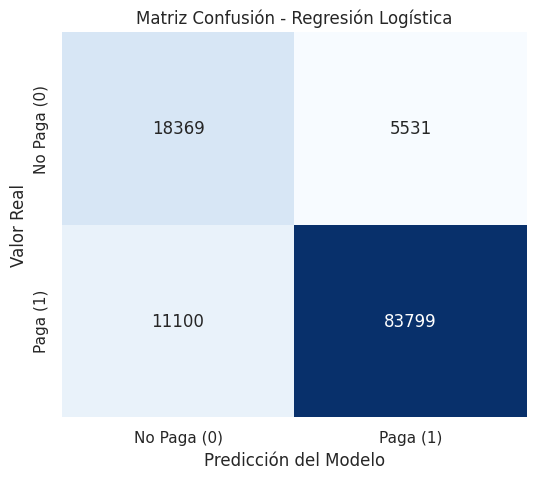

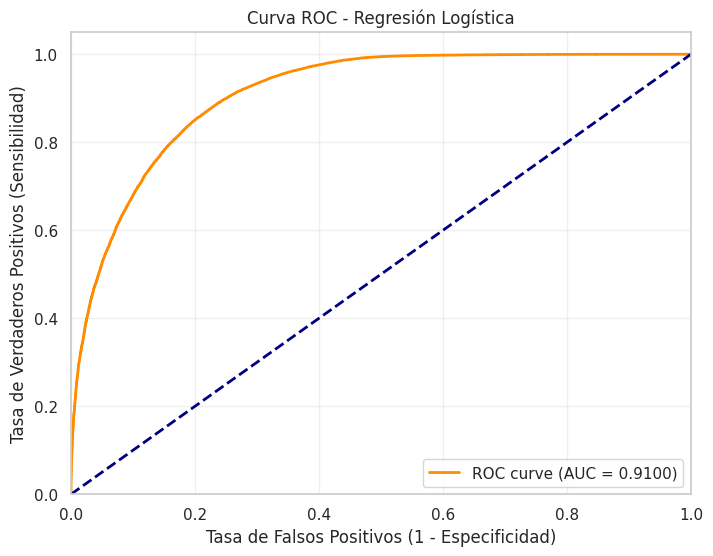


AUC Score final: 0.9100


In [ ]:
print("\n--- Reporte de Clasificación (Regresión Logística) ---")
print(classification_report(y_test, y_pred_lr))

plot_custom_confusion_matrix(y_test, y_pred_lr, title="Matriz Confusión - Regresión Logística")
print("\n\n\n")
auc_lr = plot_custom_roc_curve(y_test, y_probs_lr, title="Curva ROC - Regresión Logística")

print(f"\nAUC Score final: {auc_lr:.4f}")

## 5.2 Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Configuración del Modelo
rf_model = RandomForestClassifier(
    n_estimators=200,        # Número de árboles
    max_depth=12,            # Limita la complejidad para evitar overfitting
    min_samples_leaf=10,     # cada hoja debe tener al menos 10 datos
    class_weight='balanced', # Maneja el desbalance 80/20
    n_jobs=-1,               # Usa todos los núcleos de tu CPU
    random_state=42
)


--- Entrenando Random Forest (puede tardar un poco)... ---


In [ ]:
#entrenar
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=12,
                       min_samples_leaf=10, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [ ]:
# Predicciones
y_pred_rf = rf_model.predict(X_test)
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]


--- Reporte Random Forest ---
              precision    recall  f1-score   support

         0.0       0.63      0.77      0.70     23900
         1.0       0.94      0.89      0.91     94899

    accuracy                           0.86    118799
   macro avg       0.79      0.83      0.81    118799
weighted avg       0.88      0.86      0.87    118799



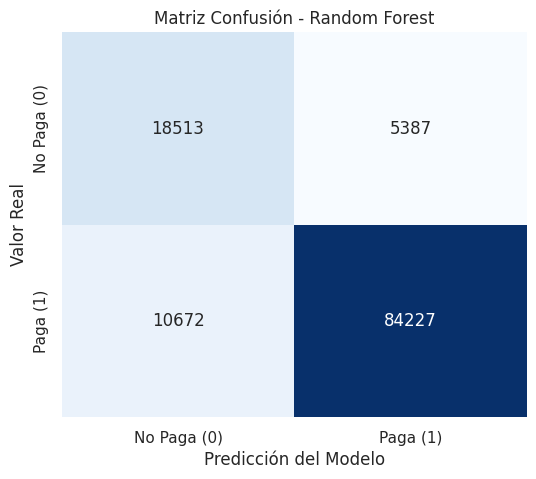

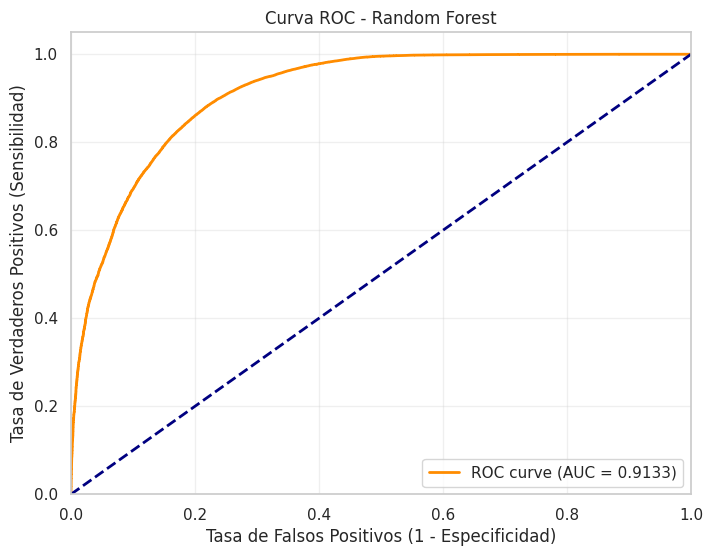

AUC Random Forest: 0.9133


In [ ]:
# Evaluación Visual
print("\n--- Reporte Random Forest ---")
print(classification_report(y_test, y_pred_rf))

plot_custom_confusion_matrix(y_test, y_pred_rf, title="Matriz Confusión - Random Forest")
print("\n\n\n")
auc_rf = plot_custom_roc_curve(y_test, y_probs_rf, title="Curva ROC - Random Forest")

print(f"AUC Random Forest: {auc_rf:.4f}")

/tmp/ipython-input-987832436.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancia, x='Importancia', y='Variable', palette='viridis')


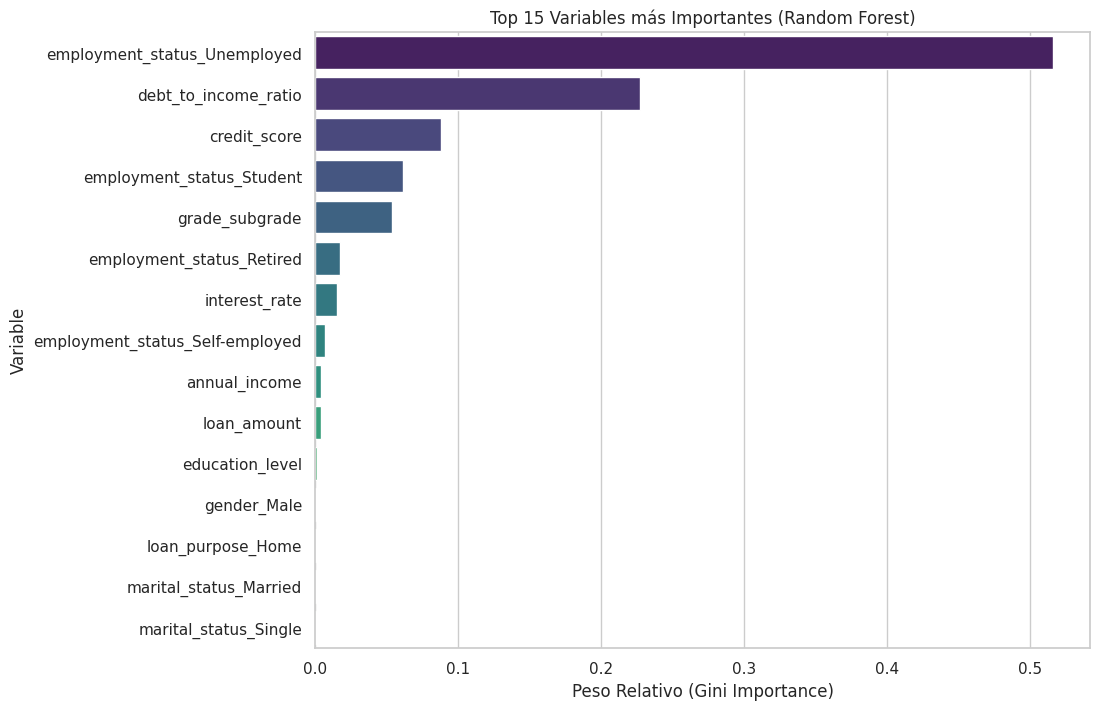

In [ ]:
# Extraer importancia
importancia = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': rf_model.feature_importances_
}).sort_values('Variable', ascending=False) # Ordenar por nombre primero para agrupar

# Ordenar por importancia real
importancia = importancia.sort_values('Importancia', ascending=False).head(15)

# Graficar
plt.figure(figsize=(10, 8))
sns.barplot(data=importancia, x='Importancia', y='Variable', palette='viridis')
plt.title('Top 15 Variables más Importantes (Random Forest)')
plt.xlabel('Peso Relativo (Gini Importance)')
plt.show()

## 5.3. XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# 1. Preparación de pesos (desbalance 80/20)
ratio_desbalance = np.sum(y_train == 0) / np.sum(y_train == 1)

In [ ]:
# 2. Configuración del Modelo
xgb_model = XGBClassifier(
    n_estimators=1000,       # Ponemos un número alto, pero Early Stopping lo frenará antes
    learning_rate=0.05,      # Velocidad de aprendizaje
    max_depth=6,             # Profundidad estándar para XGBoost
    subsample=0.8,           # Usa el 80% de datos por árbol para evitar overfitting
    colsample_bytree=0.8,    # Usa el 80% de columnas por árbol
    scale_pos_weight=ratio_desbalance, # Manejo del desbalance
    eval_metric='auc',       # optimizar AUC
    random_state=42,
    n_jobs=-1
)



In [ ]:
# 3. Crear un set de validación interno (
X_fit, X_val, y_fit, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)


In [ ]:
# 4. Entrenar
xgb_model.fit(
    X_fit, y_fit,
    eval_set=[(X_val, y_val)]
)

[0]	validation_0-auc:0.86231
[1]	validation_0-auc:0.90630
[2]	validation_0-auc:0.91035
[3]	validation_0-auc:0.90724
[4]	validation_0-auc:0.91057
[5]	validation_0-auc:0.91166
[6]	validation_0-auc:0.91236
[7]	validation_0-auc:0.91291
[8]	validation_0-auc:0.91242
[9]	validation_0-auc:0.91295
[10]	validation_0-auc:0.91345
[11]	validation_0-auc:0.91337
[12]	validation_0-auc:0.91350
[13]	validation_0-auc:0.91347
[14]	validation_0-auc:0.91351
[15]	validation_0-auc:0.91411
[16]	validation_0-auc:0.91407
[17]	validation_0-auc:0.91398
[18]	validation_0-auc:0.91407
[19]	validation_0-auc:0.91417
[20]	validation_0-auc:0.91425
[21]	validation_0-auc:0.91429
[22]	validation_0-auc:0.91434
[23]	validation_0-auc:0.91446
[24]	validation_0-auc:0.91448
[25]	validation_0-auc:0.91450
[26]	validation_0-auc:0.91453
[27]	validation_0-auc:0.91455
[28]	validation_0-auc:0.91458
[29]	validation_0-auc:0.91460
[30]	validation_0-auc:0.91465
[31]	validation_0-auc:0.91466
[32]	validation_0-auc:0.91470
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
# 5. Predicciones Finales (Sobre el Test Set original)
y_pred_xgb = xgb_model.predict(X_test)
y_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]



--- Reporte XGBoost ---
              precision    recall  f1-score   support

         0.0       0.64      0.79      0.71     23900
         1.0       0.94      0.89      0.91     94899

    accuracy                           0.87    118799
   macro avg       0.79      0.84      0.81    118799
weighted avg       0.88      0.87      0.87    118799



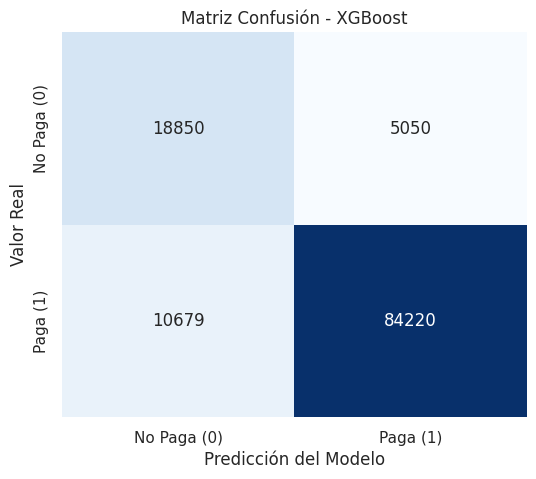

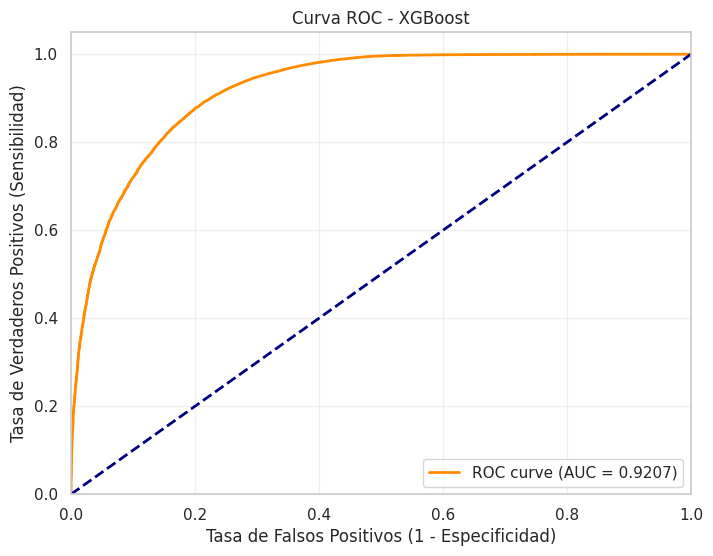

AUC XGBoost:             0.9207


In [ ]:
# 6. Evaluación
print("\n--- Reporte XGBoost ---")
print(classification_report(y_test, y_pred_xgb))

plot_custom_confusion_matrix(y_test, y_pred_xgb, title="Matriz Confusión - XGBoost")
print("\n\n\n")
auc_xgb = plot_custom_roc_curve(y_test, y_probs_xgb, title="Curva ROC - XGBoost")
print(f"AUC XGBoost:             {auc_xgb:.4f}")

## 5.4 redes neuronales

In [ ]:
from sklearn.preprocessing import StandardScaler

# 1. Identificar columnas numéricas (excluyendo las dummies que ya son 0/1)
cols_a_escalar = ['loan_amount', 'interest_rate', 'credit_score', 'debt_to_income_ratio', 'annual_income']

# 2. Crear Scaler
scaler_nn = StandardScaler()

# 3. Escalar X_train y X_test (creamos copias para no dañar lo anterior)
X_train_nn = X_train.copy()
X_test_nn = X_test.copy()

X_train_nn[cols_a_escalar] = scaler_nn.fit_transform(X_train[cols_a_escalar])
X_test_nn[cols_a_escalar] = scaler_nn.transform(X_test[cols_a_escalar])

print("Datos escalados listos para Redes Neuronales.")

Datos escalados listos para Redes Neuronales.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping


# 1. Definir Arquitectura
model_simple = Sequential([
# Capa 1: Mucho más ancha para capturar interacciones
    Dense(256, activation='swish', input_shape=(X_train_nn.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),

    # Capa 2
    Dense(128, activation='swish'),
    BatchNormalization(),
    Dropout(0.3),

    # Capa 3
    Dense(64, activation='swish'),
    BatchNormalization(),
    Dropout(0.2),

    # Capa 4
    Dense(32, activation='swish'),

    # Salida
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 2. Compilar
model_simple.compile(
    optimizer='adam',
    loss='binary_crossentropy', # La pérdida estándar para clasificación binaria
    metrics=['AUC']
)

In [ ]:
# 3. Entrenar
history_simple = model_simple.fit(
    X_train_nn, y_train,
    validation_data=(X_test_nn, y_test),
    epochs=50,             # Intentará 50 épocas
    batch_size=1024,       # Lotes grandes funcionan bien en tabular
    callbacks=[EarlyStopping(monitor='val_auc', patience=5, restore_best_weights=True, mode='max')],
    verbose=1
)

Epoch 1/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 28s 51ms/step - AUC: 0.8569 - loss: 0.3432 - val_AUC: 0.9106 - val_loss: 0.2635
Epoch 2/50
  5/465 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - AUC: 0.9067 - loss: 0.2592

/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: AUC,loss,val_AUC,val_loss
  current = self.get_monitor_value(logs)


465/465 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - AUC: 0.9075 - loss: 0.2634 - val_AUC: 0.9113 - val_loss: 0.2589
Epoch 3/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - AUC: 0.9079 - loss: 0.2615 - val_AUC: 0.9115 - val_loss: 0.2587
Epoch 4/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - AUC: 0.9091 - loss: 0.2611 - val_AUC: 0.9117 - val_loss: 0.2579
Epoch 5/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - AUC: 0.9104 - loss: 0.2589 - val_AUC: 0.9116 - val_loss: 0.2579
Epoch 6/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - AUC: 0.9091 - loss: 0.2600 - val_AUC: 0.9117 - val_loss: 0.2579
Epoch 7/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - AUC: 0.9093 - loss: 0.2605 - val_AUC: 0.9117 - val_loss: 0.2577
Epoch 8/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - AUC: 0.9098 - loss: 0.2596 - val_AUC: 0.9119 - val_loss: 0.2573
Epoch 9/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - AUC: 0.9095 - loss: 0.2589 - val_AUC: 0.9118 - val_loss: 0.2578
Epoch 10/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/s

In [ ]:
# 4. Evaluar
from sklearn.metrics import roc_auc_score
preds_simple = model_simple.predict(X_test_nn).flatten()
auc_simple = roc_auc_score(y_test, preds_simple)
print(f"\nAUC Red Neuronal Simple: {auc_simple:.4f}")

3713/3713 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step

AUC Red Neuronal Simple: 0.9123


### ResNet tabular

In [ ]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Add, Activation
from tensorflow.keras.models import Model

def create_resnet_tabular(input_dim):
    inputs = Input(shape=(input_dim,))

    # Proyección inicial (para subir la dimensión a 128)
    x = Dense(128, activation='linear')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # --- BLOQUE RESIDUAL 1 ---
    # Guardamos 'x' en una variable para sumarla después (el atajo)
    shortcut = x

    # Camino largo
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='linear')(x) # Linear antes de sumar
    x = BatchNormalization()(x)

    x = Add()([x, shortcut])
    x = Activation('relu')(x) # Activación después de sumar

    # --- BLOQUE RESIDUAL 2 ---
    shortcut = x
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='linear')(x)
    x = BatchNormalization()(x)
    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    # Salida
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
# Instanciar
model_resnet = create_resnet_tabular(X_train_nn.shape[1])

model_resnet.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['AUC']
)

In [ ]:
# Entrenar
history_resnet = model_resnet.fit(
    X_train_nn, y_train,
    validation_data=(X_test_nn, y_test),
    epochs=50,
    batch_size=1024,       #
    callbacks=[EarlyStopping(monitor='val_auc', patience=5, restore_best_weights=True, mode='max')],
    verbose=1
)

Epoch 1/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 41s 63ms/step - AUC: 0.8501 - loss: 0.3497 - val_AUC: 0.9084 - val_loss: 0.2623
Epoch 2/50


/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: AUC,loss,val_AUC,val_loss
  current = self.get_monitor_value(logs)


465/465 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - AUC: 0.9056 - loss: 0.2646 - val_AUC: 0.9099 - val_loss: 0.2599
Epoch 3/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - AUC: 0.9073 - loss: 0.2627 - val_AUC: 0.9088 - val_loss: 0.2611
Epoch 4/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - AUC: 0.9089 - loss: 0.2611 - val_AUC: 0.9104 - val_loss: 0.2590
Epoch 5/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - AUC: 0.9099 - loss: 0.2589 - val_AUC: 0.9107 - val_loss: 0.2592
Epoch 6/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - AUC: 0.9112 - loss: 0.2582 - val_AUC: 0.9106 - val_loss: 0.2591
Epoch 7/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - AUC: 0.9111 - loss: 0.2586 - val_AUC: 0.9107 - val_loss: 0.2596
Epoch 8/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - AUC: 0.9109 - loss: 0.2580 - val_AUC: 0.9113 - val_loss: 0.2580
Epoch 9/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - AUC: 0.9110 - loss: 0.2583 - val_AUC: 0.9113 - val_loss: 0.2584
Epoch 10/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/s

In [ ]:
# evaluar
preds_simple = model_resnet.predict(X_test_nn).flatten()
auc_simple = roc_auc_score(y_test, preds_simple)
print(f"\nAUC Red Neuronal Simple: {auc_simple:.4f}")

3713/3713 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step

AUC Red Neuronal Simple: 0.9107


## LightGBM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Hacemos copia del original (NO del que tiene dummies)
df_native = df.copy()

print("--- PREPARANDO DATOS NATIVOS PARA LIGHTGBM ---")

# 2. Variables Ordinales (Mantenemos la jerarquía manual)
edu_map = {'Other': 0, 'High School': 1, "Bachelor's": 2, "Master's": 3, 'PhD': 4}
df_native['education_level'] = df_native['education_level'].map(edu_map)

# 3. Grade Subgrade (Label Encoding obligatorio porque es texto ordenado)
le_grade = LabelEncoder()
df_native['grade_subgrade'] = le_grade.fit_transform(df_native['grade_subgrade'])

# 4. Variables Nominales
# En lugar de One-Hot, las convertimos a tipo 'category'
cat_cols = ['gender', 'marital_status', 'employment_status', 'loan_purpose']
for col in cat_cols:
    df_native[col] = df_native[col].astype('category')

print(f"Columnas categóricas convertidas a tipo 'category': {cat_cols}")

scaler_cols = ['loan_amount', 'interest_rate', 'credit_score', 'debt_to_income_ratio', 'annual_income']
df_native[scaler_cols] = scaler.transform(df_native[scaler_cols])
print("StandardScaler aplicado a variables numéricas continuas.")

# 5. Numéricas (Logaritmo sigue siendo buena idea)
df_native['annual_income'] = np.log1p(df['annual_income'])


# 6. Partición
X_native = df_native.drop('loan_paid_back', axis=1)
y_native = df_native['loan_paid_back']

X_train_lgb, X_test_lgb, y_train_lgb, y_test_lgb = train_test_split(
    X_native, y_native, test_size=0.2, random_state=42, stratify=y_native
)

print(f"Datos listos. Columnas totales: {X_train_lgb.shape[1]}")

--- PREPARANDO DATOS NATIVOS PARA LIGHTGBM ---
Columnas categóricas convertidas a tipo 'category': ['gender', 'marital_status', 'employment_status', 'loan_purpose']
StandardScaler aplicado a variables numéricas continuas.
Datos listos. Columnas totales: 11


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

# Instanciar el modelo
lgbm = LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    num_leaves=31,
    is_unbalance=True,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)

In [ ]:
# Entrenar
lgbm.fit(
    X_train_lgb, y_train_lgb,
    eval_set=[(X_test_lgb, y_test_lgb)],
    eval_metric='auc',
)

LGBMClassifier(is_unbalance=True, learning_rate=0.05, n_estimators=1000,
               n_jobs=-1, random_state=42, verbose=-1)

In [ ]:
# Predicciones
y_pred_lgbm = lgbm.predict(X_test_lgb)
y_probs_lgbm = lgbm.predict_proba(X_test_lgb)[:, 1]



--- REPORTE LIGHTGBM ---
              precision    recall  f1-score   support

         0.0       0.64      0.79      0.71     23900
         1.0       0.94      0.89      0.92     94899

    accuracy                           0.87    118799
   macro avg       0.79      0.84      0.81    118799
weighted avg       0.88      0.87      0.87    118799



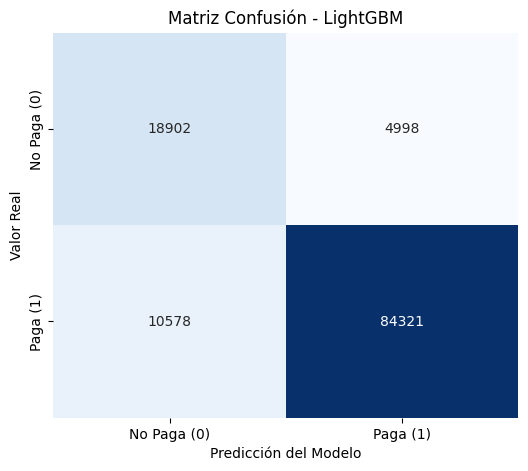

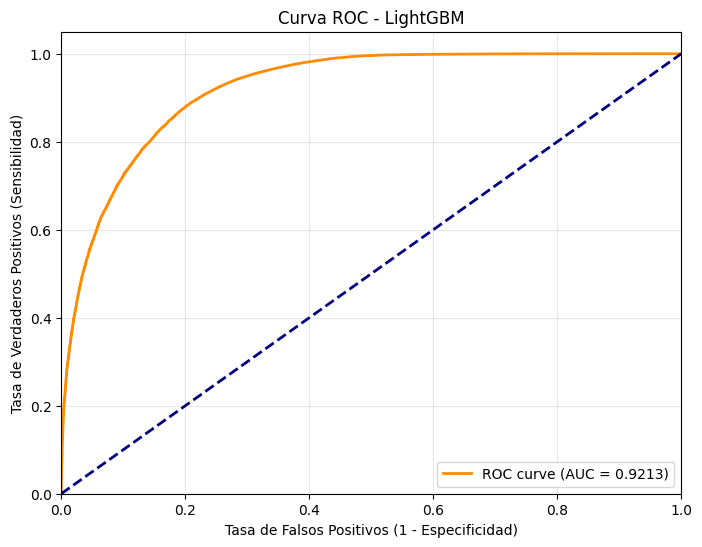

AUC LightGBM (Nativo): 0.9213


In [ ]:
# Evaluación con tus funciones gráficas
print("\n--- REPORTE LIGHTGBM ---")
print(classification_report(y_test_lgb, y_pred_lgbm))

plot_custom_confusion_matrix(y_test_lgb, y_pred_lgbm, title="Matriz Confusión - LightGBM")
print("\n\n\n")
auc_lgbm = plot_custom_roc_curve(y_test_lgb, y_probs_lgbm, title="Curva ROC - LightGBM")

print(f"AUC LightGBM (Nativo): {auc_lgbm:.4f}")

In [ ]:
test_lgbm = transform_category(test, X_native.columns, le_grade, scaler)


--- PREPARANDO DATOS NATIVOS PARA LIGHTGBM ---
Columnas categóricas convertidas a tipo 'category': ['gender', 'marital_status', 'employment_status', 'loan_purpose']
StandardScaler aplicado a variables numéricas continuas.
Dimensiones alineadas: (254569, 11)


In [ ]:
preds = lgbm.predict_proba(test_lgbm)[:, 1]

In [ ]:
submission = pd.DataFrame({
    'id': test.index,
    'loan_paid_back': preds
})

nombre_archivo = 'submission_lgbm.csv'
submission.to_csv(nombre_archivo, index=False)

print(f"Archivo '{nombre_archivo}' guardado exitosamente.")
print("Primeras 5 filas para verificar formato:")
display(submission.head())

✅ Archivo 'submission_lgbm.csv' guardado exitosamente.
Primeras 5 filas para verificar formato:


,id,loan_paid_back
0,593994,0.750650
1,593995,0.925699
2,593996,0.244406
3,593997,0.702551
4,593998,0.881460


## Redes Neuronales Embeddings

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [ ]:
df_nn = df.copy()
df_nn = transform_category(df_nn, df_nn.columns, le_grade, scaler)
X = df_nn.drop('loan_paid_back', axis=1)
y = df_nn['loan_paid_back']

--- PREPARANDO DATOS NATIVOS PARA LIGHTGBM ---
Columnas categóricas convertidas a tipo 'category': ['gender', 'marital_status', 'employment_status', 'loan_purpose']
StandardScaler aplicado a variables numéricas continuas.
Dimensiones alineadas: (593994, 12)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Entrena un LightGBM
lgb_model = lgb.LGBMClassifier(n_estimators=100, num_leaves=31, learning_rate=0.1)
lgb_model.fit(X_train, y_train)

# 3. EXTRAER LAS HOJAS
# pred_leaf=True devuelve una matriz de (n_samples, n_trees)
# Cada valor es el índice de la hoja donde cayó ese dato en ese árbol
leaves_train = lgb_model.predict(X_train, pred_leaf=True)
leaves_val = lgb_model.predict(X_val, pred_leaf=True)

print(f"Dimensiones de las hojas (Features para la NN): {leaves_train.shape}")

Dimensiones de las hojas (Features para la NN): (475195, 100)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 1. IDENTIFICAR COLUMNAS NUMÉRICAS
# Excluimos 'object' y 'category' para que StandardScaler no falle
numeric_cols = X_train.select_dtypes(include=['int64', 'float64', 'int32', 'float32']).columns.tolist()

print(f"Columnas numéricas detectadas ({len(numeric_cols)}):")
print(numeric_cols)

# 2. SEPARAR DATASETS (Solo parte numérica)
X_train_num = X_train[numeric_cols].copy()
X_val_num = X_val[numeric_cols].copy()


Columnas numéricas detectadas (7):
['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate', 'education_level', 'grade_subgrade']


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

# --- CONFIGURACIÓN ---
num_trees = leaves_train.shape[1]
num_leaves_per_tree = 31 # Ajusta según tu LGBM
num_numerical_features = X_train_num.shape[1] # columnas originales
embedding_dim = 16

# --- INPUT 1: LAS HOJAS (DEEP part) ---
input_leaves = layers.Input(shape=(num_trees,), name="leaves_input")
# Embedding compartido (aprende una representación vectorial para cada hoja)
x_emb = layers.Embedding(input_dim=num_leaves_per_tree + 1, output_dim=embedding_dim)(input_leaves)
x_emb = layers.Flatten()(x_emb)

# --- INPUT 2: VARIABLES ORIGINALES (WIDE part) ---
# Importante: X_train_scaled debe estar escalado (StandardScaler)
input_numeric = layers.Input(shape=(num_numerical_features,), name="numeric_input")

# --- CONCATENACIÓN ---
# Unimos lo que el árbol aprendió con los datos crudos
x = layers.Concatenate()([x_emb, input_numeric])

# --- CAPAS DENSAS MEJORADAS ---
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(64, activation='relu')(x)

# Salida
output_layer = layers.Dense(1, activation='sigmoid')(x)

# Modelo
model_wd = models.Model(inputs=[input_leaves, input_numeric], outputs=output_layer)

# Optimizador con Learning Rate Schedule
lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3, decay_steps=1000, decay_rate=0.9)
optimizer = optimizers.Adam(learning_rate=lr_schedule)

model_wd.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['AUC'])

model_wd.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ leaves_input        │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 100, 16)   │        512 │ leaves_input[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 1600)      │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numeric_input       │ (None, 7)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 1607)      │          0 │ flatten_1[0][0],  │
│ (Concatenate)       │                   │            │ numeric_input[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 256)       │    411,648 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256)       │      1,024 │ dense_3[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 256)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │     32,896 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_4[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 64)        │      8,256 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 1)         │         65 │ dense_5[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 454,913 (1.74 MB)

 Trainable params: 454,145 (1.73 MB)

 Non-trainable params: 768 (3.00 KB)

In [ ]:
# Asegúrate de que X_train_scaled tenga StandardScaler aplicado
model_wd.fit(
    x=[leaves_train, X_train_num], # Lista con los dos inputs
    y=y_train,
    validation_data=([leaves_val, X_val_num], y_val),
    epochs=15,
    batch_size=256,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]
)

Epoch 1/15
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - AUC: 0.9011 - loss: 0.2799 - val_AUC: 0.9193 - val_loss: 0.2498
Epoch 2/15
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.9191 - loss: 0.2480 - val_AUC: 0.9213 - val_loss: 0.2487
Epoch 3/15
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - AUC: 0.9209 - loss: 0.2462 - val_AUC: 0.9217 - val_loss: 0.2466
Epoch 4/15
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.9224 - loss: 0.2446 - val_AUC: 0.9216 - val_loss: 0.2467
Epoch 5/15
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - AUC: 0.9224 - loss: 0.2443 - val_AUC: 0.9219 - val_loss: 0.2463
Epoch 6/15
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.9237 - loss: 0.2424 - val_AUC: 0.9218 - val_loss: 0.2463
Epoch 7/15
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - AUC: 0.9239 - loss: 0.2415 - val_AUC: 0.9219 - val_loss: 0.2468
Epoch 8/15
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - AUC: 0.9252 - loss: 0.2409 - val_AUC: 0.9218 - val_loss: 0.2464


3713/3713 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step
🚀 AUC-ROC Final (Wide & Deep): 0.92196

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.89      0.61      0.72     23997
         1.0       0.91      0.98      0.94     94802

    accuracy                           0.91    118799
   macro avg       0.90      0.79      0.83    118799
weighted avg       0.90      0.91      0.90    118799



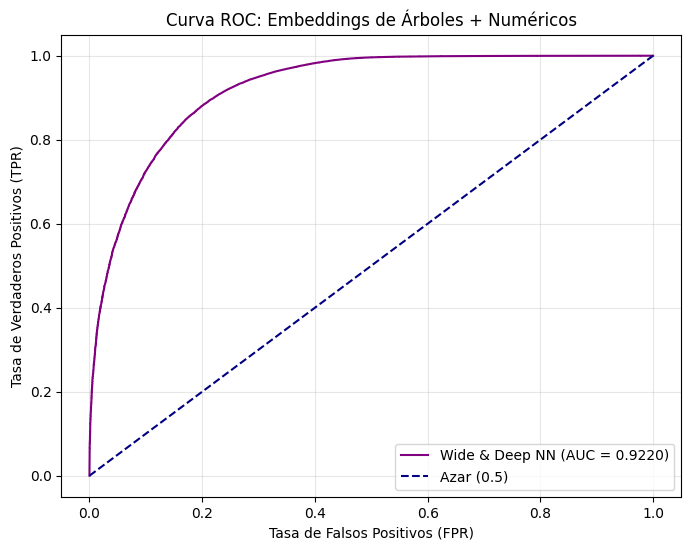

AUC: 0.9219629566960007


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

# --- A. OBTENER PREDICCIONES (CAMBIO AQUÍ) ---
y_pred_nn_prob = model_wd.predict([leaves_val, X_val_num]).ravel()

# --- B. CALCULAR MÉTRICAS ---
final_auc = roc_auc_score(y_val, y_pred_nn_prob)
print(f"🚀 AUC-ROC Final (Wide & Deep): {final_auc:.5f}")

y_pred_binary = (y_pred_nn_prob > 0.5).astype(int)
print("\nReporte de Clasificación:")
print(classification_report(y_val, y_pred_binary))

# --- C. GRÁFICA CURVA ROC ---
fpr, tpr, thresholds = roc_curve(y_val, y_pred_nn_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', label=f'Wide & Deep NN (AUC = {final_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Azar (0.5)')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC: Embeddings de Árboles + Numéricos')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

print(f"AUC: {final_auc}")

In [ ]:
X.columns

Index(['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount',
       'interest_rate', 'gender', 'marital_status', 'education_level',
       'employment_status', 'loan_purpose', 'grade_subgrade'],
      dtype='object')

In [ ]:
df_test = transform_category(test, X.columns, le_grade, scaler)
numeric_cols = df_test.select_dtypes(include=['int64', 'float64', 'int32', 'float32']).columns.tolist()
test_num = df_test[numeric_cols].copy()

--- PREPARANDO DATOS NATIVOS PARA LIGHTGBM ---
Columnas categóricas convertidas a tipo 'category': ['gender', 'marital_status', 'employment_status', 'loan_purpose']
StandardScaler aplicado a variables numéricas continuas.
Dimensiones alineadas: (254569, 11)


In [ ]:
leaves_test = lgb_model.predict(df_test, pred_leaf=True)


In [ ]:
predictions = model_wd.predict([leaves_test, test_num]).ravel()

7956/7956 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step


In [ ]:
submission = pd.DataFrame({
    'id': test.index,
    'loan_paid_back': predictions
})

submission.to_csv('submission_wide_and_deep.csv', index=False)
display(submission.head())

✅ ¡Archivo guardado! Revisa 'submission_wide_and_deep.csv'


,id,loan_paid_back
0,593994,0.946387
1,593995,0.988010
2,593996,0.539575
3,593997,0.923818
4,593998,0.970172


## Featured Engineer

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def engineer_pade_features(df_train, df_test, cols):
    """
    Aplica transformación de Aproximantes de Padé para capturar riesgo asintótico.
    Se ajusta en Train y se transforma en Test para evitar Data Leakage.
    """
    # Usamos MinMaxScaler (-1, 1) como sugiere la técnica
    scaler = MinMaxScaler(feature_range=(-1, 1))

    for col in cols:
        print(f" Generando Padé Features para: {col}")

        # 1. Ajustar Scaler solo en Train
        # Reshape necesario para sklearn (-1, 1)
        train_vals = df_train[col].values.reshape(-1, 1)
        test_vals = df_test[col].values.reshape(-1, 1)

        scaler.fit(train_vals)

        # Transformar ambos
        x_train = scaler.transform(train_vals).flatten()
        x_test = scaler.transform(test_vals).flatten()

        # Calcular la media (mu) solo del Train para usarla como referencia
        mu = np.mean(x_train)

        # Función interna para aplicar la fórmula
        def apply_pade(x_arr, mu_ref):
            # Paso 1: Desviación cuadrada (Risk deviation)
            z_sq = (x_arr - mu_ref)**2

            # Paso 2: Aproximante de Padé [2/2]
            # Coeficientes del post original (puedes tunearlos, pero estos suelen funcionar)
            eps = 1e-6
            num = 1.0 + 0.5 * z_sq + 0.1 * (z_sq**2)
            den = 1.0 + 0.3 * z_sq + 0.05 * (z_sq**2) + eps

            return num / den

        # --- APLICAR A TRAIN ---
        df_train[f'{col}_pade_risk'] = apply_pade(x_train, mu)
        # Recíproco (ayuda con valores extremos en la cola)
        df_train[f'{col}_recip'] = 1 / (x_train + 1.1)

        # --- APLICAR A TEST ---
        df_test[f'{col}_pade_risk'] = apply_pade(x_test, mu)
        df_test[f'{col}_recip'] = 1 / (x_test + 1.1)

    return df_train, df_test

In [ ]:
# --- USO RECOMENDADO ---
# Solo aplícalo a variables continuas con "riesgo de cola" (outliers peligrosos)
risk_candidates = [
    'annual_income',
    'loan_amount',
]

df_fe , df_test_fe = df.copy(), test.copy()
df_fe, df_test_fe = engineer_pade_features(df_fe, df_test_fe, risk_candidates)

print("Nuevas variables Padé generadas.")

🔧 Generando Padé Features para: annual_income
🔧 Generando Padé Features para: loan_amount
✅ Nuevas variables Padé generadas.


In [ ]:
df_fe = transform_category(df_fe, df_fe.columns, le_grade, scaler)
df_test_fe = transform_category(df_test_fe, df_test_fe.columns, le_grade, scaler)

--- PREPARANDO DATOS NATIVOS PARA LIGHTGBM ---
Columnas categóricas convertidas a tipo 'category': ['gender', 'marital_status', 'employment_status', 'loan_purpose']
StandardScaler aplicado a variables numéricas continuas.
Dimensiones alineadas: (593994, 16)
--- PREPARANDO DATOS NATIVOS PARA LIGHTGBM ---
Columnas categóricas convertidas a tipo 'category': ['gender', 'marital_status', 'employment_status', 'loan_purpose']
StandardScaler aplicado a variables numéricas continuas.
Dimensiones alineadas: (254569, 15)


In [ ]:
X, y = df_fe.drop('loan_paid_back', axis=1), df_fe['loan_paid_back']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
import lightgbm as lgb

# Configuración básica
lgb_params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'n_estimators': 2000,
    'learning_rate': 0.03,
    'num_leaves': 31,
    'max_depth': -1, # LGBM prefiere crecer por hojas (leaves)
    'scale_pos_weight': 4, # Ajusta esto según tu desbalance
    'random_state': 42,
    'n_jobs': -1
}

# Entrenar (usando StratifiedKFold como hiciste antes o simple fit)
model_lgb = lgb.LGBMClassifier(**lgb_params)
model_lgb.fit(X_train, y_train, eval_set=[(X_test, y_test)],
              callbacks=[lgb.early_stopping(50)])



[LightGBM] [Info] Number of positive: 379595, number of negative: 95600
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2352
[LightGBM] [Info] Number of data points in the train set: 475195, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.798819 -> initscore=1.378932
[LightGBM] [Info] Start training from score 1.378932
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1388]	valid_0's auc: 0.921099


NameError: name 'roc_auc_score' is not defined

In [ ]:
from sklearn.metrics import roc_auc_score


In [ ]:
# Predicciones
preds_lgb = model_lgb.predict_proba(X_test)[:, 1]
print("Score LGBM:", roc_auc_score(y_test, preds_lgb))

Score LGBM: 0.9210986637588406


In [ ]:
# Predicciones
y_pred = model_lgb.predict(X_test)
y_probs= model_lgb.predict_proba(X_test)[:, 1]


--- REPORTE LIGHTGBM ---
              precision    recall  f1-score   support

         0.0       0.96      0.51      0.67     23900
         1.0       0.89      1.00      0.94     94899

    accuracy                           0.90    118799
   macro avg       0.93      0.75      0.80    118799
weighted avg       0.91      0.90      0.89    118799



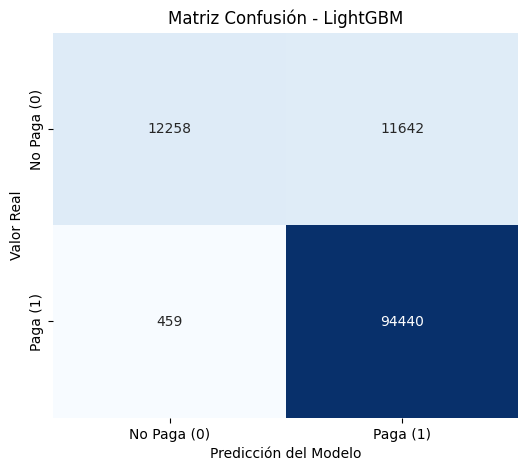

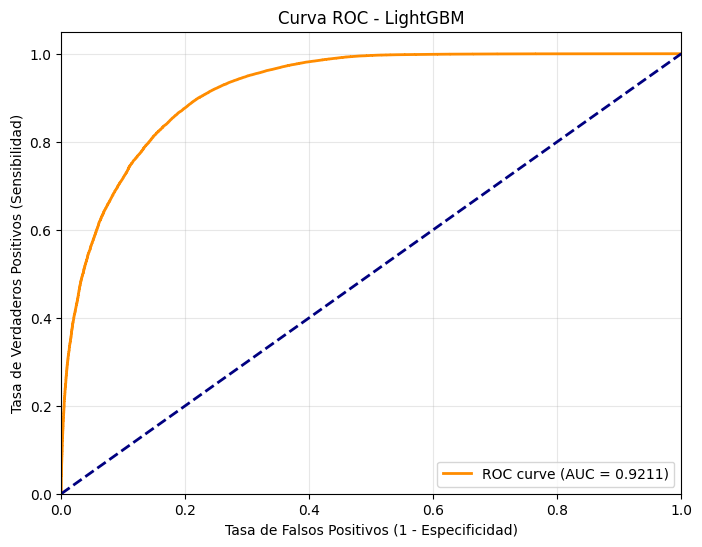

AUC LightGBM (Nativo): 0.9211


In [ ]:
# Evaluación con tus funciones gráficas
print("\n--- REPORTE LIGHTGBM ---")
print(classification_report(y_test, y_pred))

plot_custom_confusion_matrix(y_test, y_pred, title="Matriz Confusión - LightGBM")
print("\n\n\n")
auc_lgbm = plot_custom_roc_curve(y_test, y_probs, title="Curva ROC - LightGBM")

print(f"AUC LightGBM (Nativo): {auc_lgbm:.4f}")

In [ ]:
preds = model_lgb.predict_proba(df_test_fe)[:, 1]

In [ ]:
submission = pd.DataFrame({
    'id': df_test_fe.index,
    'loan_paid_back': preds
})

nombre_archivo = 'submission_best_lgbm.csv'
submission.to_csv(nombre_archivo, index=False)

print(f"✅ Archivo '{nombre_archivo}' guardado exitosamente.")
print("Primeras 5 filas para verificar formato:")
display(submission.head())

✅ Archivo 'submission_best_lgbm.csv' guardado exitosamente.
Primeras 5 filas para verificar formato:


,id,loan_paid_back
0,593994,0.981871
1,593995,0.990526
2,593996,0.793595
3,593997,0.981993
4,593998,0.988334


# Ponderar mejores dos modelos

In [ ]:
import pandas as pd

# 1. Cargar los archivos
df_lgbm = pd.read_csv('/content/submission_lgbm.csv')
df_nn = pd.read_csv('/content/submission_wide_and_deep.csv')


assert all(df_lgbm['id'] == df_nn['id']), "¡Error! Los IDs no coinciden."


weight_lgbm = 0.70
weight_nn = 0.30


df_blend = df_lgbm.copy()

df_blend['loan_paid_back'] = (df_lgbm['loan_paid_back'] * weight_lgbm) + \
                     (df_nn['loan_paid_back'] * weight_nn)

df_blend.to_csv('submission_blend_final.csv', index=False)

print("¡Archivo 'submission_blend_final.csv' creado!")
print(f"Pesos usados -> LGBM: {weight_lgbm}, NN: {weight_nn}")

✅ ¡Archivo 'submission_blend_final.csv' creado!
Pesos usados -> LGBM: 0.7, NN: 0.3


# Conclusiones

/tmp/ipython-input-1624510835.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


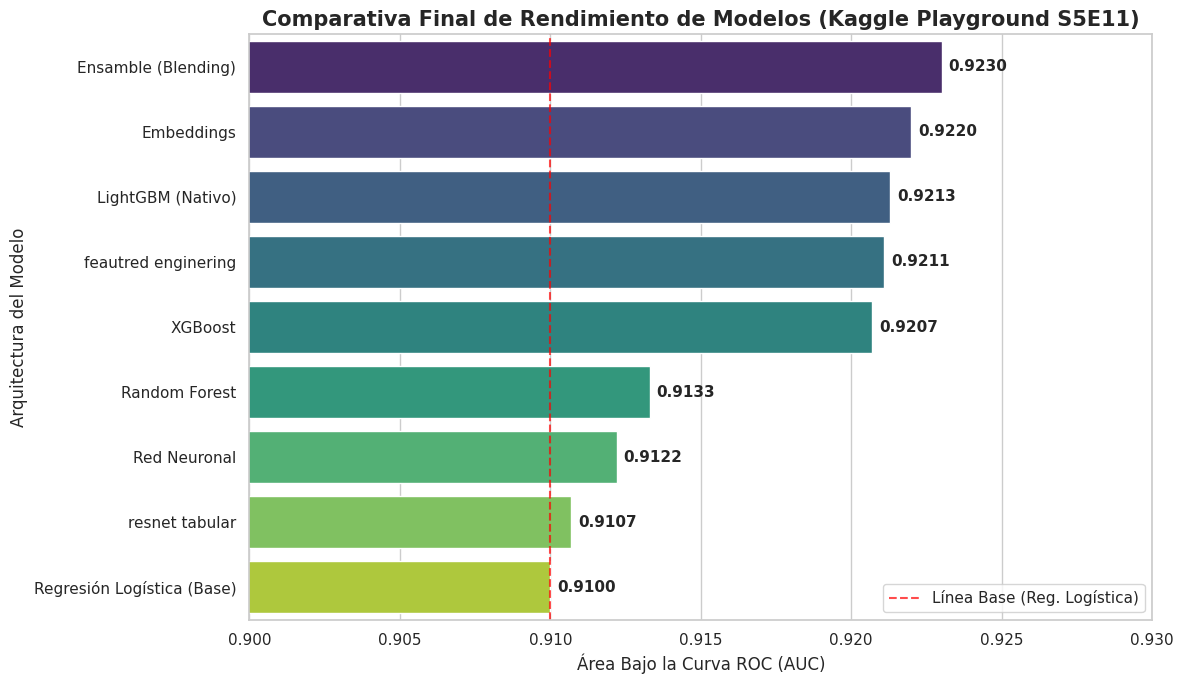

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Recopilamos los resultados (Reemplaza con TUS valores exactos finales)
# Estos son valores estimados basados en lo que conversamos
resultados_finales = {
    'Modelo': [
        'Regresión Logística (Base)',
        'resnet tabular',
        'Red Neuronal',
        'Random Forest',
        'XGBoost',
        'feautred enginering',
        'LightGBM (Nativo)',
        'Embeddings',
        'Ensamble (Blending)',
    ],
    'AUC-ROC Score': [
        0.9100,
        0.9107,
        0.9122,
        0.9133,
        0.9207,
        0.9211,
        0.9213,
        0.922,
        0.9230
    ]
}

df_resultados = pd.DataFrame(resultados_finales).sort_values('AUC-ROC Score', ascending=False)

# 2. Configuración del Gráfico
plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid")

# Barplot
ax = sns.barplot(
    data=df_resultados,
    x='AUC-ROC Score',
    y='Modelo',
    palette='viridis'
)

# 3. Añadir etiquetas de valor en cada barra
for i in ax.containers:
    ax.bar_label(i, fmt='%.4f', padding=5, fontsize=11, fontweight='bold')

# 4. Línea de referencia (El Baseline)
plt.axvline(x=0.9100, color='red', linestyle='--', alpha=0.7, label='Línea Base (Reg. Logística)')

plt.title('Comparativa Final de Rendimiento de Modelos (Kaggle Playground S5E11)', fontsize=15, fontweight='bold')
plt.xlabel('Área Bajo la Curva ROC (AUC)', fontsize=12)
plt.ylabel('Arquitectura del Modelo', fontsize=12)
plt.xlim(0.90, 0.93) # Ajustamos el zoom para ver las diferencias pequeñas
plt.legend(loc='lower right')
plt.tight_layout()

plt.show()

El desarrollo de este proyecto permitió construir un sistema de riesgo crediticio, superando un AUC de 0.92 mediante técnicas de ensamble. A continuación, se detallan los hallazgos principales:


Uno de los descubrimientos más contraintuitivos del EDA fue la irrelevancia del ingreso absoluto.

**Hallazgo:** Un solicitante que gana \$50,000 anuales tiene prácticamente la misma probabilidad de impago que uno que gana \$300,000 si su nivel de deuda es alto.  
**Implicación:** El factor crítico no es la riqueza, sino la solvencia relativa (`debt_to_income_ratio`) y la estabilidad laboral (`employment_status`). Un cliente desempleado es casi garantía de impago (correlación -0.62), independientemente de su historial previo.


- **Modelos Lineales vs. No Lineales:** Aunque la Regresión Logística ofreció un rendimiento base sólido (AUC 0.9100), los modelos basados en árboles (XGBoost, LightGBM) lograron capturar mejor las interacciones complejas no lineales, como la relación entre tasas de interés y montos de préstamo.
- **Redes Neuronales:** La implementación de una arquitectura híbrida (Embeddings de árboles + Datos numéricos) demostró que el Deep Learning puede competir en datos tabulares, aportando diversidad al sistema.
- **Ensamble:** La combinación ponderada de los mejores modelos (Blending) permitió reducir la varianza y alcanzar el puntaje máximo, demostrando que la diversidad de algoritmos supera a cualquier modelo individual.


**La estrategia de tratamiento de datos fue determinante**:

- El manejo nativo de categorías en LightGBM demostró ser más eficiente que el One-Hot Encoding tradicional.
- La transformación logarítmica de la variable `annual_income` fue importante para controlar el sesgo de los valores extremos y estabilizar el entrenamiento.


En los resultados de la competencia el mejor modelo tuvo un score de 0.92939, y el mejor de nosotros fue el ponderado de el modelo LGBM y

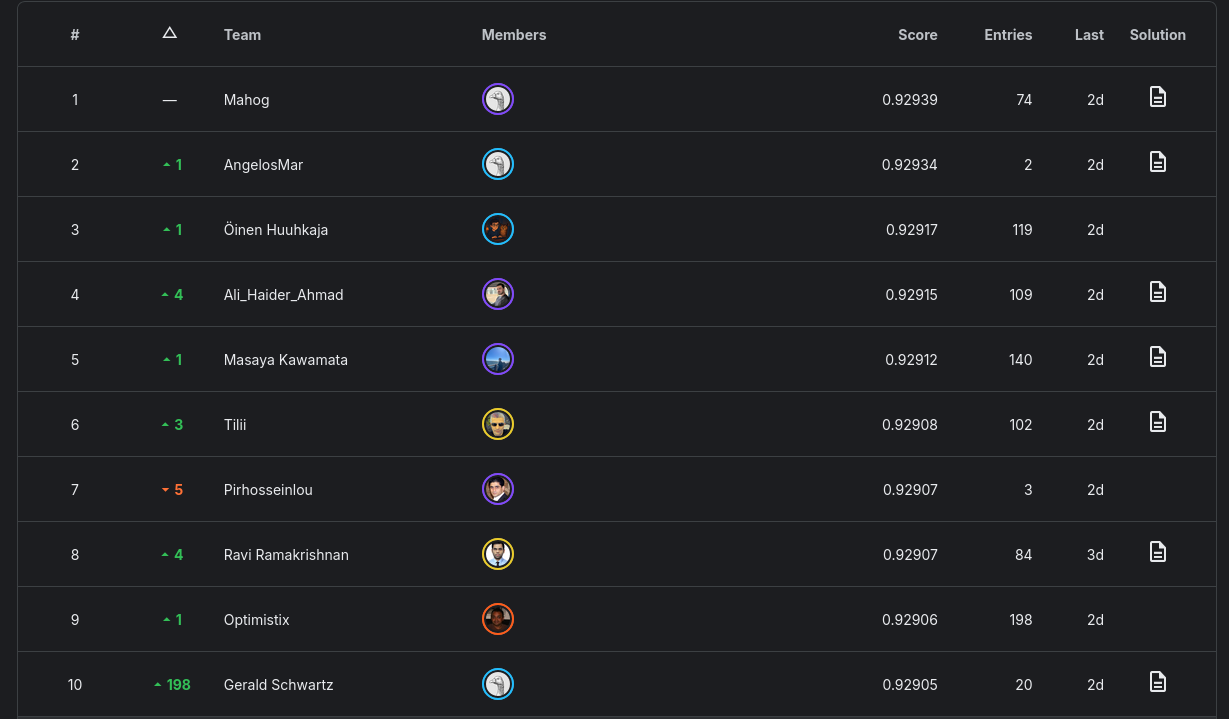

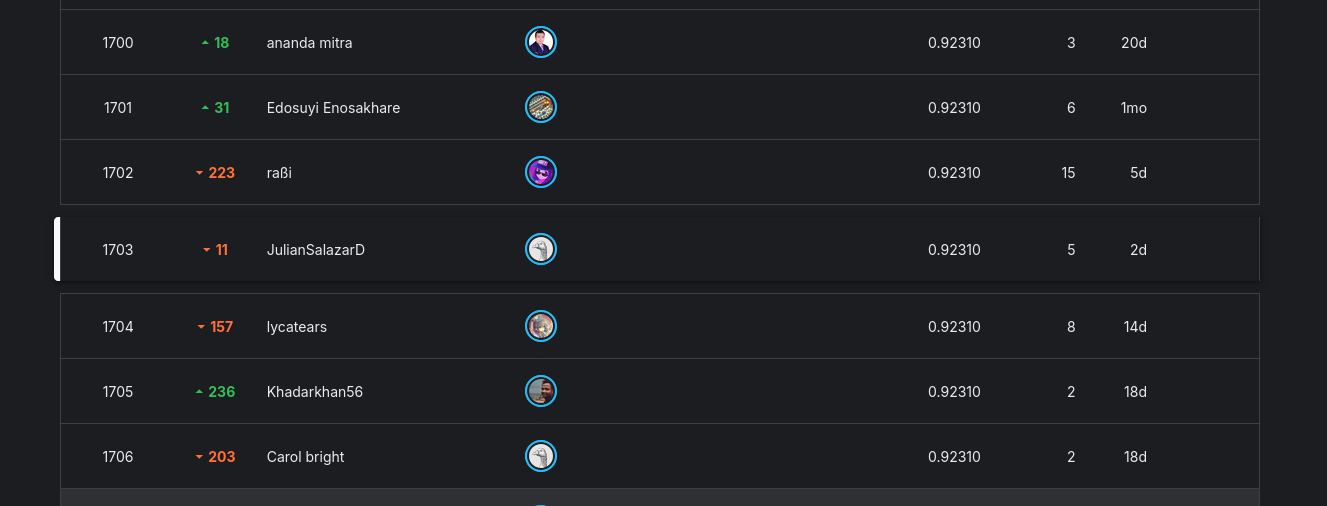